固体内拡散に関するPDE/Govenig equation
\begin{equation*}
  \frac{\partial C_s(r, t)}{\partial t} = \frac{D_s}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial C_s(r, t)}{\partial r}\right) \\
  \frac{\partial C_s(r, t)}{\partial t} = D_s\left(\frac{2}{r}\frac{\partial C_s(r, t)}{\partial r}+\frac{\partial^2 C_s(r, t)}{\partial r^2}\right)
\end{equation*}

境界条件
\begin{equation*}
\frac{\partial C_s}{\partial r} \vert _{r=r_i} = 0 \\
- D_s\frac{\partial C_s}{\partial r} \vert _{r=r_0} = \frac{J_{Li}}{a_sF} \\
\end{equation*}

about J_Li
\begin{equation*}
J_{Li} = \frac{I}{A}.....\tt{(constant)}
\end{equation*}

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint

In [19]:
# initial parameter
N, L = 1000, 10 #長さL をN個に区切る
dr = L / N
t_max, t_div = 1000, 5000
t = np.linspace(0, t_max, t_div) 
dt = t_max/t_div
r = np.linspace(0, L, N)
C0=1
Ds = 0.002
a_s = 0.05
F = 96500
J_Li = 0.1 #(mol/lsec-1)

#境界条件
dC_r_0_dr_0 = J_Li/a_s/F/-Ds

#import sys
#sys.setrecursionlimit(100)

In [20]:
#t = 0,  C(r, 0)
C_s = pd.DataFrame(np.ones(N)*C0)
#C_s = np.ones(L)*C0 #mol%

In [21]:
for k in range(len(t)):
    C_s[k+1] = dt*Ds*(2/r*np.gradient(C_s[k], dr) +  np.gradient(np.gradient(C_s[k], dr), dr))+ C_s[k]
    C_s[k+1][0] = C_s[k][0]+J_Li/a_s/F/-Ds*dt
    #C_C_s[k+1][0] = C_s[k][0]+J_Li/a_s/F/-Ds

C:\Users\ayana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\ayana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\ayana\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1771: RuntimeWarning: overflow encountered in true_divide
  out[slice1] = (f[slice4] - f[slice2]) / (2. * ax_dx)
C:\Users\ayana\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1792: RuntimeWarning: overflow encountered in true_divide
  out[slice1] = (f[slice2] - f[slice3]) / dx_0
C:\Users\ayana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in add
  
C:\Users\ayana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  
C:\Users\ayana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in add
  
C:\Users\ayana\Anaconda3\lib\site

In [22]:
C_s

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,1.0,0.997927,0.995855,0.993782,0.991710,0.989637,0.987565,0.985492,0.983420,0.981347,...,-9.344041,-9.346114,-9.348187,-9.350259,-9.352332,-9.354404,-9.356477,-9.358549,-9.360622,-9.362694
1,1.0,1.000000,1.004137,0.991718,0.994561,1.152628,0.446465,1.224808,8.043106,-33.113432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.000000,0.997927,0.989662,1.032376,0.946713,0.684201,3.041783,-3.510774,-8.819423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.000000,1.000000,1.006897,0.995830,0.943973,1.354849,0.304799,-1.035264,20.151822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.000000,1.000000,0.997927,0.984844,1.058170,0.923468,0.383696,4.824966,-7.217325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.000000,1.000000,1.000000,1.008554,0.997732,0.894479,1.585299,-0.029753,-2.911423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,1.000000,1.000000,1.000000,0.997927,0.981220,1.082873,0.887659,0.113909,6.797754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,1.000000,1.000000,1.000000,1.000000,1.009737,0.997533,0.847980,1.859165,-0.675941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,1.000000,1.000000,1.000000,1.000000,0.997927,0.978429,1.108927,0.828678,-0.104396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.010657,0.995533,0.804945,2.183095,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


type(fig): <class 'matplotlib.figure.Figure'>


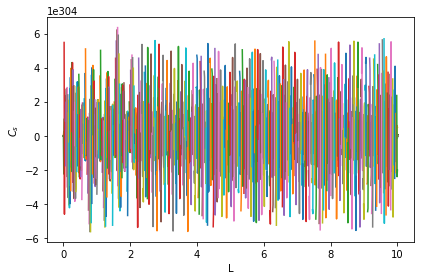

In [23]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
fig = plt.figure() #figsize=(16,9))
print("type(fig): {}".format(type(fig))) #わからん

#2 Axesのインスタンス作成
#ax3 = fig.add_subplot(121)
ax1 = fig.add_subplot(111)

#3 データを渡してプロット
ax1.plot(r, C_s, label='exp.')

ax1.set_xlabel("L")
ax1.set_ylabel("$C_s$")

#ax1.legend()

fig.tight_layout() #かぶり

plt.show()
#ax2.plot(x, trajectories)